In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib import cm

from algorithms import *
from benchmark import *

# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [bayesian_optimization, latin_hypercube, nelder_mead, particle_swarm, response_surface, sobol]


# Find the global minimum throughout the sampling process for model-based algorithms
def best_history(data): 
    best = []
    for i,cd in enumerate(data):
        if (i == 0): best.append(cd)
        else:
            if (cd <= best[-1]): best.append(cd)
            else: best.append(best[-1])
    return best


params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

path = "/mnt/c/Users/poselin/Downloads/"


## Benchmark tests: focus on one graph for better visibility

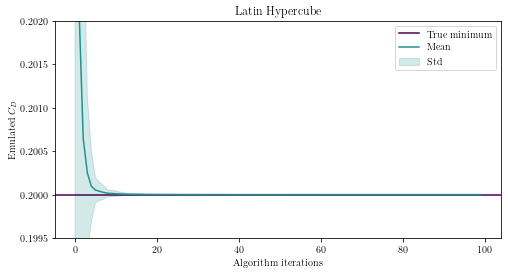

In [7]:
# Set the number of points to consider for each test
sampling_budget = 100

# Set the number of tests to run, on which estimate the standard deviation and mean
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

colors = cm.viridis(np.linspace(0, 1, 5))


# Set the new plots
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

fcn = lambda i : GoldsteinPrice(i)

# Estimate the function output
Fx = fcn(points.T)

# Rescaling the function to 0.20 - 0.35 range
Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20

Y_log = []
for test in range(tests):
    Xmin, Ymin, X, Y = latin_hypercube(Fn, sampling_budget=sampling_budget)
    Y_log.append(best_history(Y))
Y_log = np.vstack(Y_log)

Ystd  = np.std(Y_log, axis=0)
Ymean = np.mean(Y_log, axis=0)

# Plot the performances
ax.axhline(y = np.min(Fn(points.T)), color = colors[0], linestyle = '-')

ax.plot(range(len(Ymean)), Ymean, color=colors[2])
ax.fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation', color=colors[2])
ax.set_ylim([0.1995, 0.202])
ax.set_title("Latin Hypercube")
ax.set_xlabel("Algorithm iterations")
ax.set_ylabel(r"Emulated $C_D$")
ax.legend(["True minimum", "Mean", "Std"])
# ax.set_ylabel()

plt.savefig(path + 'Plot_250tests_focus.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

## Benchmark tests: no labels and legends

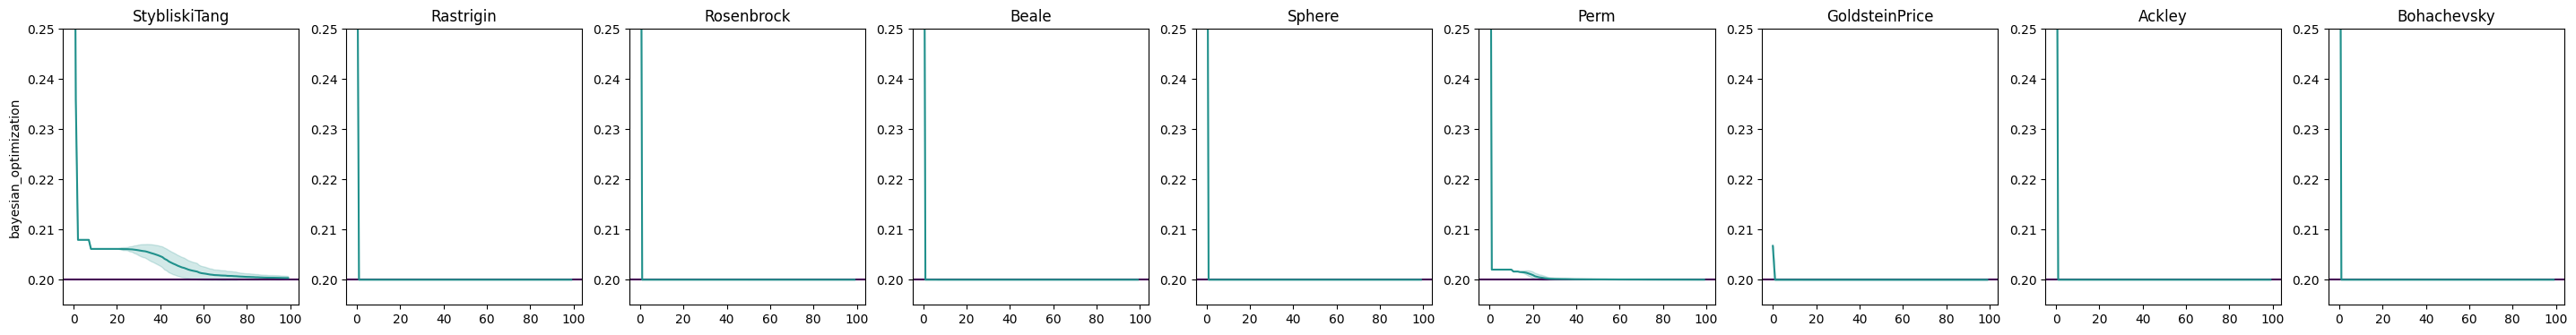

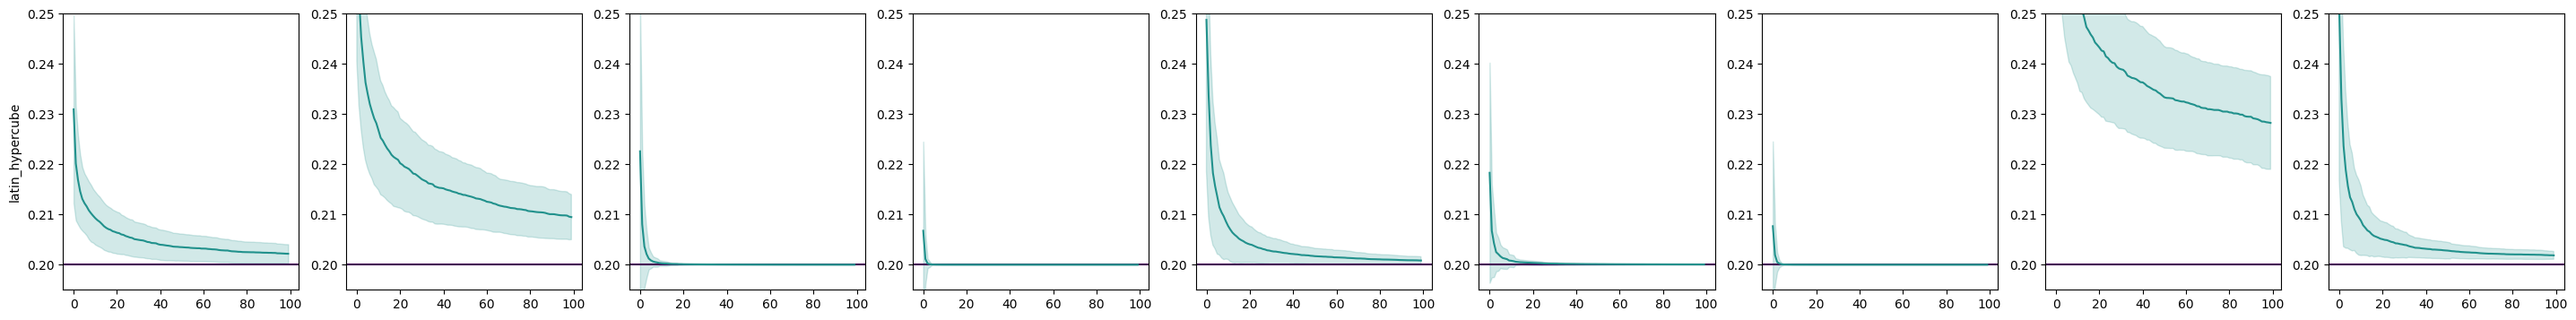

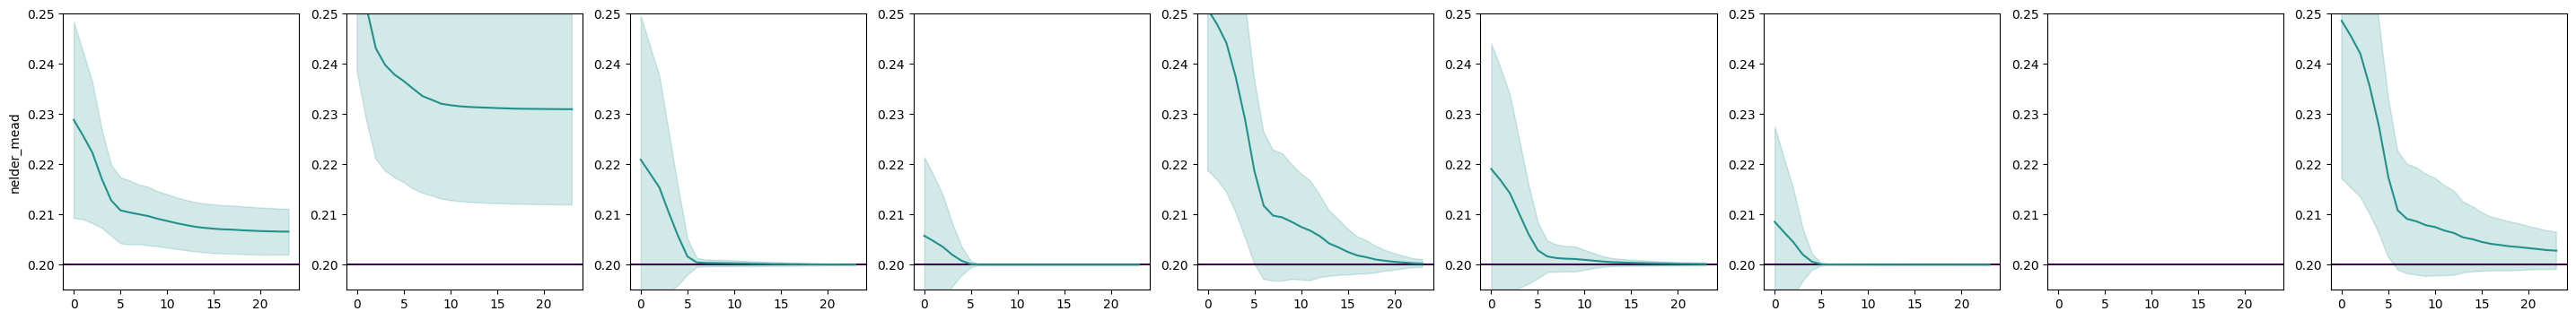

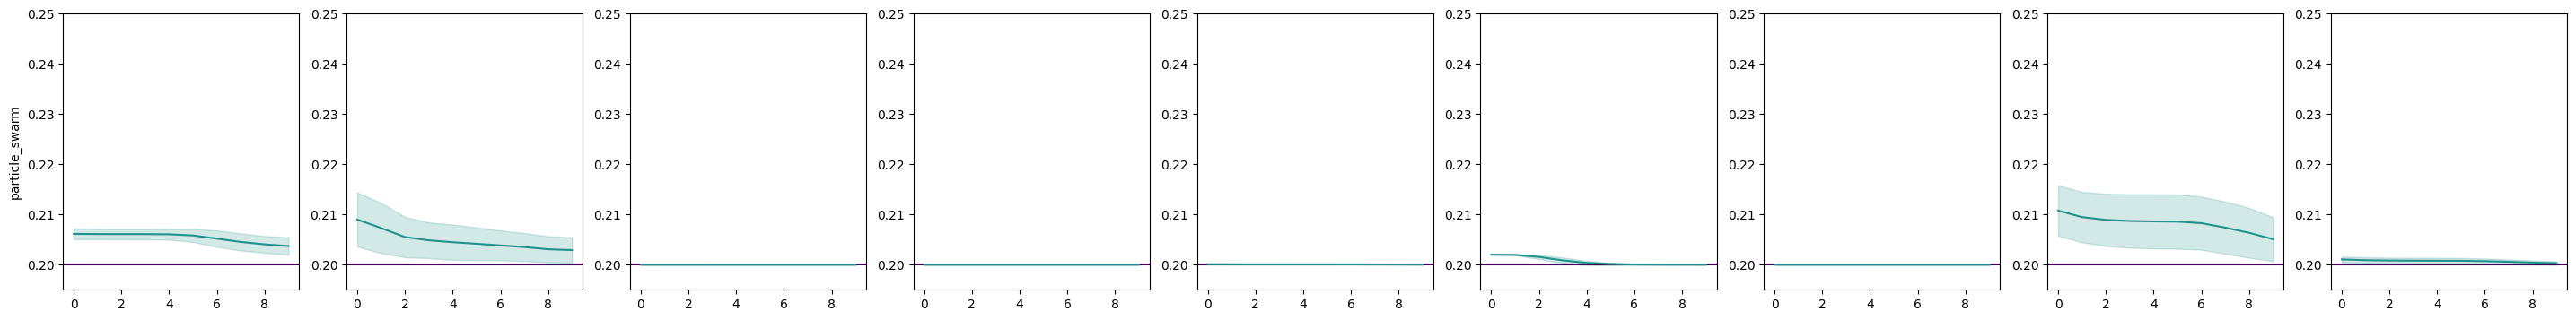

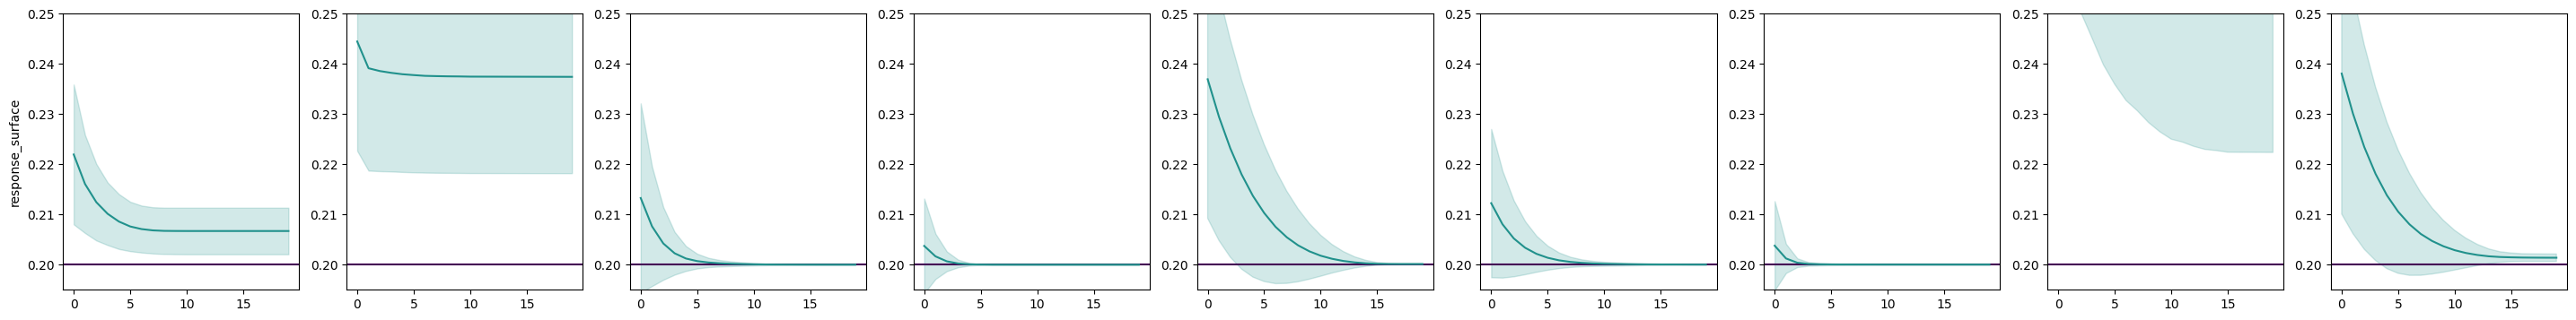

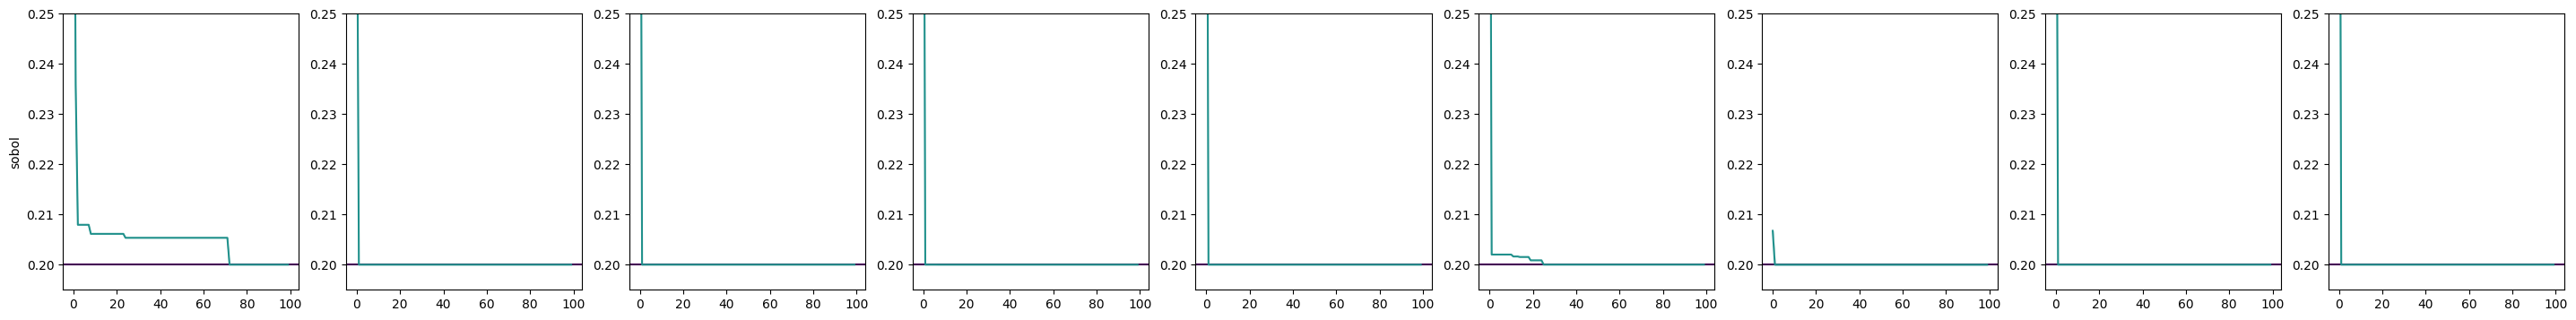

In [6]:
# Set the number of points to consider for each test
sampling_budget = 100

# Set the number of tests to run, on which estimate the standard deviation and mean
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

colors = cm.viridis(np.linspace(0, 1, 5))

for fi, optimizer in enumerate(algorithms_list):


    # Set the new plots
    fig, ax = plt.subplots(1, len(benchmarkfunction_list), figsize=(4*len(benchmarkfunction_list), 4))

    for idx, fcn in enumerate(benchmarkfunction_list):

        # Estimate the function output
        Fx = fcn(points.T)

        # Rescaling the function to 0.20 - 0.35 range
        Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20

        Y_log = []
        for test in range(tests):
            Xmin, Ymin, X, Y = optimizer(Fn, sampling_budget=sampling_budget)
            if (fi in [0,1,2,5]): Y_log.append(best_history(Y))
            else: Y_log.append(Y)
        Y_log = np.vstack(Y_log)

        # Compute mean and standard deviation, to be plotted
        Ystd  = np.std(Y_log, axis=0)
        Ymean = np.mean(Y_log, axis=0)

        # Plot the performances
        ax[idx].axhline(y = np.min(Fn(points.T)), color=colors[0], linestyle = '-')

        ax[idx].plot(range(len(Ymean)), Ymean, color=colors[2])
        ax[idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation', color=colors[2])
        ax[idx].set_ylim([0.195, 0.25])

        if (fi  == 0): ax[idx].set_title(fcn.__name__)
        if (idx == 0): ax[idx].set_ylabel(optimizer.__name__)

    plt.show()

## Urquhart model benchmark

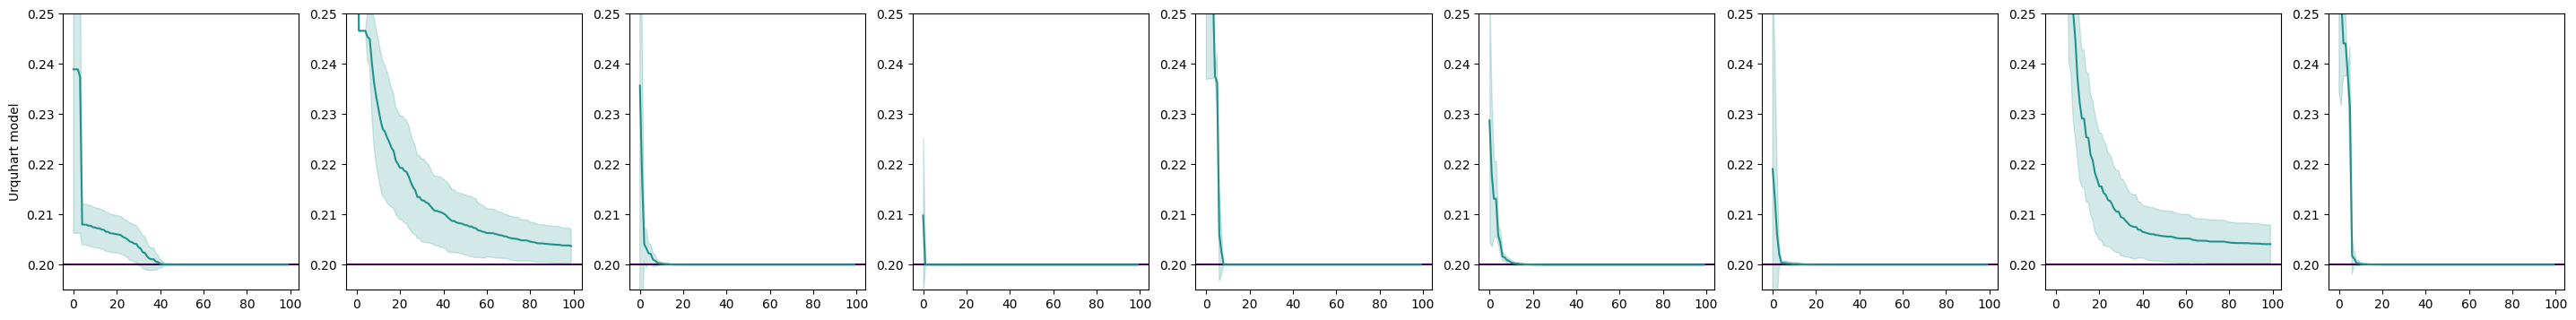

In [3]:
colors = cm.viridis(np.linspace(0, 1, 5))

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Set the new plots
fig, ax = plt.subplots(1, len(benchmarkfunction_list), figsize=(4*len(benchmarkfunction_list), 4))

data = glob.glob('./data/*')

for idx, fcn in enumerate(benchmarkfunction_list):

    # Estimate the function output
    Fx = fcn(points.T)

    # Rescaling the function to 0.20 - 0.35 range
    Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20
    
    Y_log = []
    for test in data:
        
        if fcn.__name__ in test:
            Y = pd.read_csv(test, header=None).to_numpy()
            
            Y_log.append(best_history(Y.reshape(-1,)))
            
    Y_log = np.vstack(Y_log)

    # Compute mean and standard deviation, to be plotted
    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)

    # Plot the performances
    ax[idx].axhline(y = np.min(Fn(points.T)), color=colors[0], linestyle = '-')

    ax[idx].plot(range(len(Ymean)), Ymean, color=colors[2])
    ax[idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation', color=colors[2])
    ax[idx].set_ylim([0.195, 0.25])

    if (idx == 0): ax[idx].set_ylabel("Urquhart model")

plt.show()

## Focus on one test, 4 different algorihtms (for $\sigma$ comparison)

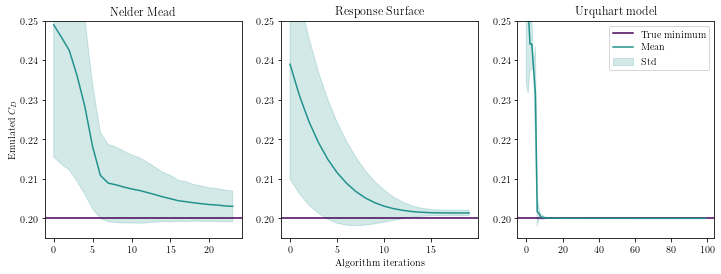

In [8]:
# Set the number of points to consider for each test
sampling_budget = 100

# Set the number of tests to run, on which estimate the standard deviation and mean
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

colors = cm.viridis(np.linspace(0, 1, 5))


algorithms_list = [nelder_mead, response_surface]
alg_name = ["Nelder Mead", "Response Surface"]
benchmarkfunction_list = [Bohachevsky]
data = glob.glob('./data/*')


for idx, fcn in enumerate(benchmarkfunction_list):

    # Set the new plots
    fig, ax = plt.subplots(1, len(algorithms_list)+1, figsize=(4*(len(algorithms_list) +1), 4))

    # Estimate the function output
    Fx = fcn(points.T)

    # Rescaling the function to 0.20 - 0.35 range
    Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20

    for fi, optimizer in enumerate(algorithms_list):


        Y_log = []
        for test in range(tests):
            Xmin, Ymin, X, Y = optimizer(Fn, sampling_budget=sampling_budget)
            if (fi in [0,1,2,5]): Y_log.append(best_history(Y))
            else: Y_log.append(Y)
        Y_log = np.vstack(Y_log)

        Ystd  = np.std(Y_log, axis=0)
        Ymean = np.mean(Y_log, axis=0)

        # Plot the performances
        ax[fi].axhline(y = np.min(Fn(points.T)), color = colors[0], linestyle = '-')

        ax[fi].plot(range(len(Ymean)), Ymean, color=colors[2])
        ax[fi].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation', color=colors[2])
        ax[fi].set_ylim([0.195, 0.25])
        ax[fi].set_title(alg_name[fi])
        if (fi): ax[fi].set_xlabel("Algorithm iterations")
        if (not fi): ax[fi].set_ylabel(r"Emulated $C_D$")
        #ax[fi].legend(["True minimum", "Mean", "Std"])

        
    Y_log = []
    for test in data:
        
        if fcn.__name__ in test:
            Y = pd.read_csv(test, header=None).to_numpy()
            
            Y_log.append(best_history(Y.reshape(-1,)))
            
    Y_log = np.vstack(Y_log)

    # Compute mean and standard deviation, to be plotted
    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)

    # Plot the performances
    ax[idx+len(algorithms_list)].axhline(y = np.min(Fn(points.T)), color=colors[0], linestyle = '-')
    ax[idx+len(algorithms_list)].plot(range(len(Ymean)), Ymean, color=colors[2])
    ax[idx+len(algorithms_list)].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation', color=colors[2])
    ax[idx+len(algorithms_list)].set_ylim([0.195, 0.25])
    ax[idx+len(algorithms_list)].set_title("Urquhart model")    
    #ax[idx+len(algorithms_list)].set_xlabel("Algorithm iterations")    
    ax[idx+len(algorithms_list)].legend(["True minimum", "Mean", "Std"])

plt.savefig(path + 'Plot_250tests_std_focus.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()